In [4]:
from GoogleNews import GoogleNews
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import re
import string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rithikaannareddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rithikaannareddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rithikaannareddy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rithikaannareddy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
googlenews = GoogleNews(start='03/01/2024',end='03/16/2024')
googlenews.get_news('latest supply chain', 'el nino supply chain')
googlenews.search('supply chain')

In [9]:
result_0=googlenews.result()
desc_1 = googlenews.get_texts()
link_1 = googlenews.get_links()

for i in list(range(2, 70)):

    result = googlenews.page_at(i)
    desc = googlenews.get_texts()
    link = googlenews.get_links()

    desc_1 = desc_1 + desc
    link_1 = link_1 + link
column_names = ["title", 'link']
data = pd.DataFrame(columns = column_names)

data['title'] = desc_1
data['link'] = link_1
display(data)

HTTP Error 429: Too Many Requests


,title,link
0,Preparing for 2024 supply chain challenges and...,news.google.com/articles/CBMiVmh0dHBzOi8vd3d3L...
1,Supply Chain Orchestration: A New Era in Suppl...,news.google.com/articles/CBMib2h0dHBzOi8vd3d3L...
2,How AI will revolutionize supply chains,news.google.com/articles/CBMiTGh0dHBzOi8vd3d3L...
3,Supply Chain Latest: Red Sea Shipping Disruptions,news.google.com/articles/CBMiZmh0dHBzOi8vd3d3L...
4,Tightening supply chains could be good news fo...,news.google.com/articles/CBMifmh0dHBzOi8vd3d3L...
...,...,...
43265,So you think you know your supply chain?,https://www.ft.com/content/687c2a10-403b-4a93-...
43266,The Unwinding of Global Tech Supply Chains,https://www.bcg.com/publications/2023/the-unwi...
43267,Three Ways To Future-Proof Your Supply Chain M...,https://www.forbes.com/sites/forbesbusinesscou...
43268,Top 10 disruptive supply chain tech | Supply C...,https://supplychaindigital.com/top10/top-10-su...


In [10]:
data.to_csv('google_news.csv', index = False)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43270 entries, 0 to 43269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   43270 non-null  object
 1   link    43270 non-null  object
dtypes: object(2)
memory usage: 676.2+ KB


In [12]:
#Checking for missing values
np.sum(data.isnull().any(axis=1))

0

In [52]:
data['title_processed'] = [title.lower() for title in data['title']]

In [53]:
def unnecessary_words(title_processed):
  return re.sub(r'\b\w{1,2}\b', '',title_processed)
data['title_processed'] = data['title_processed'].apply(lambda x: unnecessary_words(x))
data['title_processed'].head()

0    preparing for 2024 supply chain challenges and...
1    supply chain orchestration:  new era  supply c...
2                how  will revolutionize supply chains
3    supply chain latest: red sea shipping disruptions
4    tightening supply chains could  good news for ...
Name: title_processed, dtype: object

In [54]:
def cleaning_repeating_char(title_processed):
  return re.sub(r'(.)1+', r'1', title_processed)
data['title_processed'] = data['title_processed'].apply(lambda x: cleaning_repeating_char(x))
data['title_processed'].head()

0    preparing for 2024 supply chain challenges and...
1    supply chain orchestration:  new era  supply c...
2                how  will revolutionize supply chains
3    supply chain latest: red sea shipping disruptions
4    tightening supply chains could  good news for ...
Name: title_processed, dtype: object

In [55]:
def cleaning_URLs(title_processed):
  return re.sub(r'http\S+', ' ', title_processed)
  #return re.sub('((www.[^s]+)|(https?://[^s]+))'," ",tweet_processed)
data['title_processed'] = data['title_processed'].apply(lambda x: cleaning_URLs(x))
data['title_processed'].head()

0    preparing for 2024 supply chain challenges and...
1    supply chain orchestration:  new era  supply c...
2                how  will revolutionize supply chains
3    supply chain latest: red sea shipping disruptions
4    tightening supply chains could  good news for ...
Name: title_processed, dtype: object

In [56]:
#removing HTML tags
def remove_html(title_processed):
  html=re.compile(r'<.*?>')
  return html.sub(r'', title_processed)
data['title_processed'] = data['title_processed'].apply(remove_html)

In [57]:
def remove_com(title_processed):
  return re.sub(r"\ [A-Za-z]*\.com", " ", title_processed)
data['title_processed'] = data['title_processed'].apply(lambda x: remove_com(x))
data['title_processed'].head()

0    preparing for 2024 supply chain challenges and...
1    supply chain orchestration:  new era  supply c...
2                how  will revolutionize supply chains
3    supply chain latest: red sea shipping disruptions
4    tightening supply chains could  good news for ...
Name: title_processed, dtype: object

In [58]:
#cleaning and removing numeric numbers
def cleaning_numbers(title_processed):
  return re.sub('[0-9]+', '', title_processed)
data['title_processed'] = data['title_processed'].apply(lambda x: cleaning_numbers(x))
data['title_processed'].head()

0    preparing for  supply chain challenges and pri...
1    supply chain orchestration:  new era  supply c...
2                how  will revolutionize supply chains
3    supply chain latest: red sea shipping disruptions
4    tightening supply chains could  good news for ...
Name: title_processed, dtype: object

In [59]:
def stripping_extra_spaces(title_processed):
  return re.sub(r' +', ' ', title_processed)
data['title_processed'] = data['title_processed'].apply(lambda x: stripping_extra_spaces(x))
data['title_processed'].head()

0    preparing for supply chain challenges and prio...
1    supply chain orchestration: new era supply cha...
2                 how will revolutionize supply chains
3    supply chain latest: red sea shipping disruptions
4    tightening supply chains could good news for t...
Name: title_processed, dtype: object

In [60]:
add_words = ['â€˜', ' ðŸšš ðŸš', 'Visit','say','give','would','demo', 'center', 'Itâ€™s', 'â‡ï', 'ðŸŒŽ','scm', 's', 'get','take','help', 'read', 'more', 'new', 'one', 'supply','webinar','republic','latin']
stop_words.extend(add_words)

def cleaning_stopwords(title_processed):
  return " ".join([word for word in str(title_processed).split() if word not in stop_words])
data['title_processed'] = data['title_processed'].apply(lambda title_processed: cleaning_stopwords(title_processed))
data['title_processed'].head()

0         preparing chain challenges priorities
1     chain orchestration: era chain management
2                          revolutionize chains
3    chain latest: red sea shipping disruptions
4     tightening chains could good news economy
Name: title_processed, dtype: object

In [61]:
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
data['title_processed'] = data['title_processed'].apply(clean)
data['title_processed']

0            preparing chain challenges priorities
1         chain orchestration era chain management
2                             revolutionize chains
3        chain latest red sea shipping disruptions
4        tightening chains could good news economy
                           ...                    
43265                            think know chain 
43266                 unwinding global tech chains
43267     three ways future proof chain management
43268     top disruptive chain tech chain magazine
43269                 proactive steps secure chain
Name: title_processed, Length: 43270, dtype: object

In [62]:
mydata = pd.DataFrame(data[['title','title_processed']])

In [63]:
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(title_processed):
  tags = pos_tag(word_tokenize(title_processed))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist
mydata['pos tagged'] = mydata['title_processed'].apply(token_stop_pos)
mydata.head()

,title,title_processed,pos tagged
0,Preparing for 2024 supply chain challenges and...,preparing chain challenges priorities,"[(preparing, v), (chain, n), (challenges, n), ..."
1,Supply Chain Orchestration: A New Era in Suppl...,chain orchestration era chain management,"[(chain, n), (orchestration, n), (era, n), (ch..."
2,How AI will revolutionize supply chains,revolutionize chains,"[(revolutionize, n), (chains, n)]"
3,Supply Chain Latest: Red Sea Shipping Disruptions,chain latest red sea shipping disruptions,"[(chain, n), (latest, a), (red, a), (sea, n), ..."
4,Tightening supply chains could be good news fo...,tightening chains could good news economy,"[(tightening, n), (chains, n), (could, None), ..."


In [64]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemmatized_sent'] = mydata['pos tagged'].apply(lemmatize)
mydata.head()

,title,title_processed,pos tagged,Lemmatized_sent
0,Preparing for 2024 supply chain challenges and...,preparing chain challenges priorities,"[(preparing, v), (chain, n), (challenges, n), ...",prepare chain challenge priority
1,Supply Chain Orchestration: A New Era in Suppl...,chain orchestration era chain management,"[(chain, n), (orchestration, n), (era, n), (ch...",chain orchestration era chain management
2,How AI will revolutionize supply chains,revolutionize chains,"[(revolutionize, n), (chains, n)]",revolutionize chain
3,Supply Chain Latest: Red Sea Shipping Disruptions,chain latest red sea shipping disruptions,"[(chain, n), (latest, a), (red, a), (sea, n), ...",chain late red sea shipping disruption
4,Tightening supply chains could be good news fo...,tightening chains could good news economy,"[(tightening, n), (chains, n), (could, None), ...",tightening chain could good news economy


In [65]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(title_processed):
    return TextBlob(title_processed).sentiment.subjectivity

# function to calculate polarity
def getPolarity(title_processed):
    return TextBlob(title_processed).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <= 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [66]:
mydata['Polarity'] = mydata['Lemmatized_sent'].apply(getPolarity)
mydata['Analysis'] = mydata['Polarity'].apply(analysis)
mydata.head()

,title,title_processed,pos tagged,Lemmatized_sent,Polarity,Analysis
0,Preparing for 2024 supply chain challenges and...,preparing chain challenges priorities,"[(preparing, v), (chain, n), (challenges, n), ...",prepare chain challenge priority,0.00,Negative
1,Supply Chain Orchestration: A New Era in Suppl...,chain orchestration era chain management,"[(chain, n), (orchestration, n), (era, n), (ch...",chain orchestration era chain management,0.00,Negative
2,How AI will revolutionize supply chains,revolutionize chains,"[(revolutionize, n), (chains, n)]",revolutionize chain,0.00,Negative
3,Supply Chain Latest: Red Sea Shipping Disruptions,chain latest red sea shipping disruptions,"[(chain, n), (latest, a), (red, a), (sea, n), ...",chain late red sea shipping disruption,-0.15,Negative
4,Tightening supply chains could be good news fo...,tightening chains could good news economy,"[(tightening, n), (chains, n), (could, None), ...",tightening chain could good news economy,0.70,Positive


In [67]:
tb_counts = mydata.Analysis.value_counts()
tb_counts

Analysis
Negative    33657
Positive     9613
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2e86d4250>,
 [Text(-0.8427801113941134, 0.7069099545476255, 'Negative'),
  Text(0.8427801444869557, -0.7069099150942405, 'Positive')],
 [Text(-0.45969824257860725, 0.38558724793506843, '77.8%'),
  Text(0.45969826062924846, -0.38558722641504023, '22.2%')])

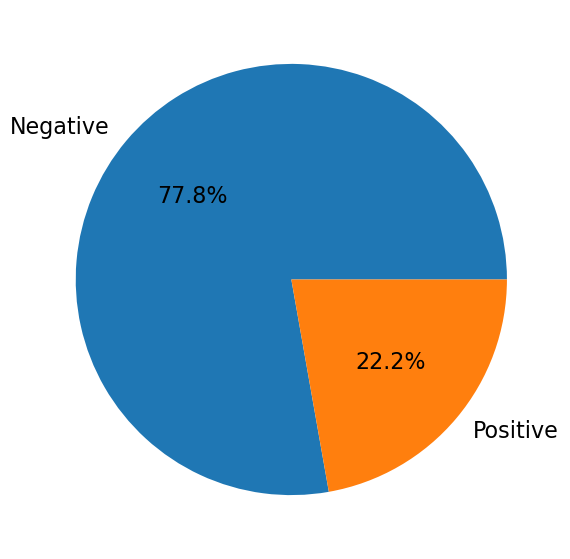

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= mydata.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

In [173]:
!pip install vaderSentiment

In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(title_processed):
    vs = analyzer.polarity_scores(title_processed)
    return vs['compound']
mydata['Vader Sentiment'] = mydata['Lemmatized_sent'].apply(vadersentimentanalysis)

In [70]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
mydata['Vader_Analysis'] = mydata['Vader Sentiment'].apply(vader_analysis)
mydata.head()

,title,title_processed,pos tagged,Lemmatized_sent,Polarity,Analysis,Vader Sentiment,Vader_Analysis
0,Preparing for 2024 supply chain challenges and...,preparing chain challenges priorities,"[(preparing, v), (chain, n), (challenges, n), ...",prepare chain challenge priority,0.00,Negative,0.0772,Neutral
1,Supply Chain Orchestration: A New Era in Suppl...,chain orchestration era chain management,"[(chain, n), (orchestration, n), (era, n), (ch...",chain orchestration era chain management,0.00,Negative,0.0000,Neutral
2,How AI will revolutionize supply chains,revolutionize chains,"[(revolutionize, n), (chains, n)]",revolutionize chain,0.00,Negative,0.0000,Neutral
3,Supply Chain Latest: Red Sea Shipping Disruptions,chain latest red sea shipping disruptions,"[(chain, n), (latest, a), (red, a), (sea, n), ...",chain late red sea shipping disruption,-0.15,Negative,-0.3612,Neutral
4,Tightening supply chains could be good news fo...,tightening chains could good news economy,"[(tightening, n), (chains, n), (could, None), ...",tightening chain could good news economy,0.70,Positive,0.4404,Neutral


In [71]:
#count of sentiments with Neutral sentiment being considered
vader_counts = mydata['Vader_Analysis'].value_counts()
vader_counts

Vader_Analysis
Neutral     36017
Positive     4480
Negative     2773
Name: count, dtype: int64

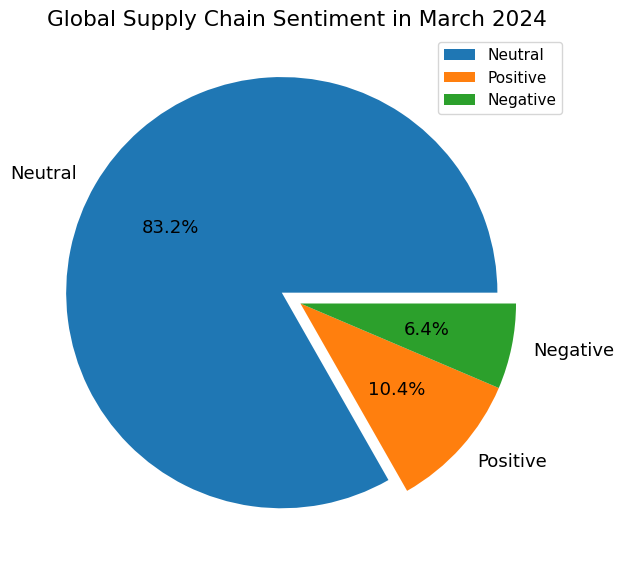

In [72]:
vader_counts= mydata['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.rcParams['font.size'] = '13'
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.title("Global Supply Chain Sentiment in March 2024 ")
plt.legend(fontsize = 11)

In [73]:
from wordcloud import WordCloud, ImageColorGenerator

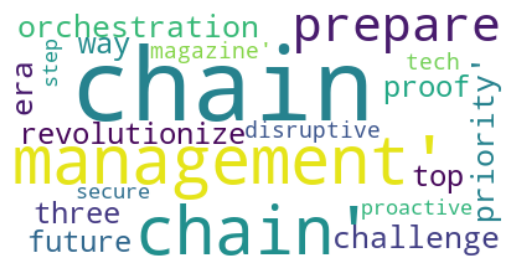

In [74]:
def create_wordcloud(text):
  wc = WordCloud(background_color = 'white', max_words=3000, repeat=False)
  wc.generate(str(text))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()
create_wordcloud(mydata['Lemmatized_sent'].values)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(mydata['Lemmatized_sent'])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))

count_vect_df = pd.DataFrame(countVector.toarray(), columns = countVectorizer.get_feature_names_out())
count_vect_df

43270 Number of tweets have 1184 words


,abuse,accelerate,accenture,acquire,acquisition,across,act,action,actively,adapt,...,world,worth,wow,wrath,wright,year,york,zara,zealand,zim
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
counts = pd.DataFrame(count_vect_df.sum())
count_df = counts.sort_values(0, ascending = False).head(20)
count_df

,0
chain,37443
global,3563
management,2594
law,2228
software,1753
market,1670
logistics,1577
human,1495
business,1330
reliance,1330


Text(0.5, 1.0, '20 Most frequently used words - Supply Chain, March 2024')

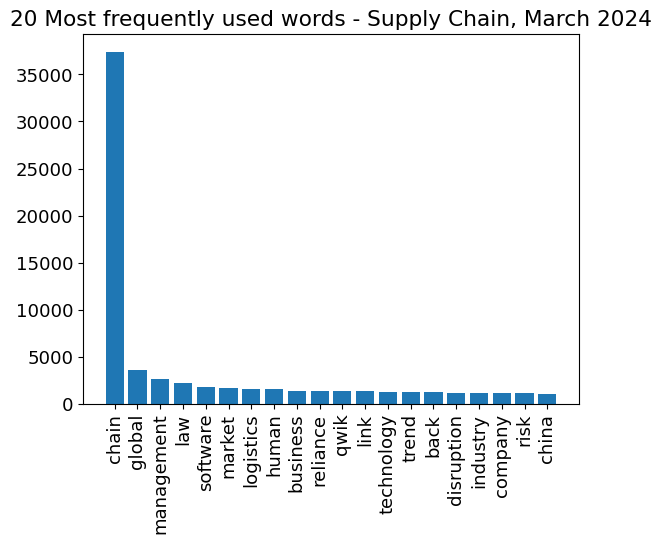

In [77]:
ind = count_df.index
val = [item for sublist in count_df.values for item in sublist]
plt.bar(ind, val)
plt.xticks(rotation=90)
plt.title('20 Most frequently used words - Supply Chain, March 2024')

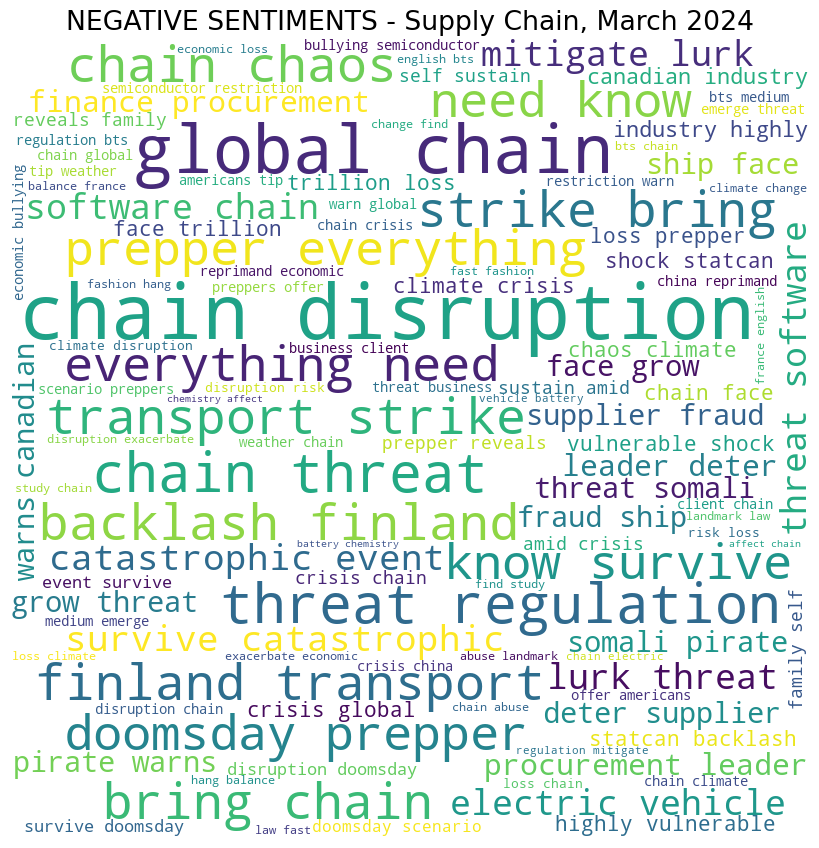

In [78]:
word_cloud_df = mydata.loc[mydata['Vader_Analysis'] == 'Negative', :]
all_words = ' '.join([text for text in word_cloud_df['Lemmatized_sent']])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.rcParams['font.size'] = '16'
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('NEGATIVE SENTIMENTS - Supply Chain, March 2024')
plt.show()

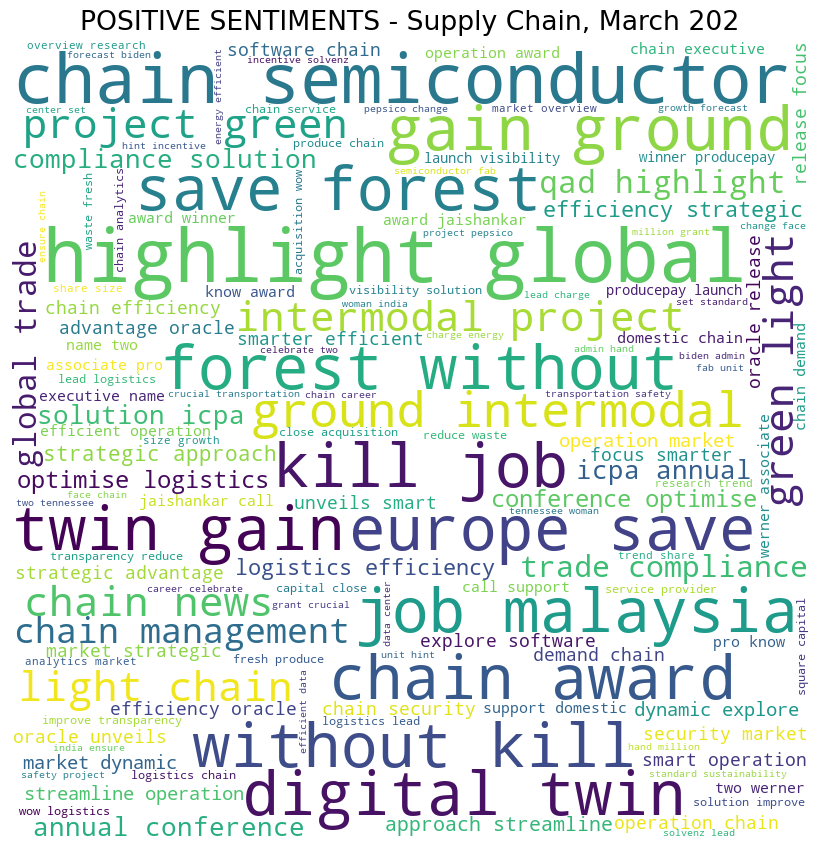

In [79]:
word_cloud_df1 = mydata.loc[mydata['Vader_Analysis'] == 'Positive', :]
all_words = ' '.join([text for text in word_cloud_df1['Lemmatized_sent']])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.rcParams['font.size'] = '16'
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('POSITIVE SENTIMENTS - Supply Chain, March 202')
plt.show()

In [80]:
from nltk.util import ngrams
#tokens = mydata['Lemmatized_sent'].str.split()
#sequences = [tokens[i:] for i in range(3)]
#bigrams = zip(*sequences)
n_grams = ngrams(mydata['Lemmatized_sent'].str.split(), 3)
for grams in n_grams:
    print(grams)

#output = list(ngrams(mydata['Lemmatized_sent'], 5))
#print(output)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(mydata.Lemmatized_sent).toarray()
y = mydata.Vader_Analysis.map({'Positive': 1, 'Neutral': 0, 'Negative':-1}).values
featureNames = tfidf.get_feature_names_out()

print("Number of features:", len(featureNames))
print("Features:", featureNames)

Number of features: 1184
Features: ['abuse' 'accelerate' 'accenture' ... 'zara' 'zealand' 'zim']


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [84]:
X_train.shape, X_test.shape

((34616, 1184), (8654, 1184))

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)
y_pred

array([ 0,  0,  0, ...,  0,  0, -1])

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 567    0    0]
 [  28 6920  243]
 [   0    0  896]]
The model accuracy is 0.968685001155535


In [87]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9458054079038595